In [98]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython import embed
SAVE_DIR = "/home/ahugessen/Documents/Courses/IFT6163/Final Project/images/"
# read json file
files = ['smirl_carnival_deaths', 
         'smirl_carnival_task_reward']
data = {}
for file in files:
    with open(f'/home/ahugessen/Documents/Courses/IFT6163/Final Project/data/{file}.json') as f:
        data[file] = json.load(f)[0]


import pandas as pd

In [99]:
import pandas as pd

In [100]:
df = pd.DataFrame()
for key, val in data.items():
    min_len = min(len(x) for x in val.values() if isinstance(x, list))
    val = {k: v[:min_len] if isinstance(v, list) else v for k, v in val.items()}

    temp_df = pd.DataFrame.from_records(val)
    temp_df['alg'] = key.split('_')[0]
    df = pd.concat([df, temp_df])

In [101]:
df['type'] = df.name.str.split('/').str[-1].str.split(' ').str[0]

In [102]:
with open(f'/home/ahugessen/Documents/Courses/IFT6163/Final Project/data/carnival_task_reward_chart_data.json') as f:
    data = json.load(f)

In [103]:
for d in data:
    min_len = min(len(d['x']), len(d['y']))
    temp_df = pd.DataFrame({'x':d['x'][:min_len],'y':d['y'][:min_len]})
    temp_df['type'] = "task_reward"
    temp_df['alg'] = d['name'].split('_')[-1]
    df = pd.concat([df, temp_df])

In [104]:
with open(f'/home/ahugessen/Documents/Courses/IFT6163/Final Project/data/carnival_death_max_vs_epoch_chart_data.json') as f:
    data = json.load(f)

In [105]:
for d in data:
    min_len = min(len(d['x']), len(d['y']))
    temp_df = pd.DataFrame({'x':d['x'][:min_len],'y':d['y'][:min_len]})
    temp_df['type'] = "death"
    temp_df['alg'] = d['name'].split('_')[-1]
    df = pd.concat([df, temp_df])

In [106]:
df[df.alg=='smirl'].x.max()


2999

In [107]:
df = df[df.x < 3000]

In [108]:
df.alg.unique()

array(['smirl', 'FixedLengthAlphas', 'RandomAgent', 'SA', 'RandomAlphas',
       'FixedAlphasTraining'], dtype=object)

In [109]:
plot_names = {'smirl': 'S-Min',
             'SA': 'S-Adapt',
             'FixedAlphasTraining': 'S-Adapt (Fixed Training)',
             'RandomAlphas': 'Random Switching',
             'FixedLengthAlphas': 'Fixed Length Switching',
             'RandomAgent': 'Random Agent'}

In [110]:
df.alg = df.alg.replace(plot_names)

In [111]:
import seaborn as sns

In [112]:
include_list = ['S-Min', 'S-Adapt (Fixed Training)', 'S-Adapt', 'Random Agent', 'Random Switching', 'Fixed Length Switching']

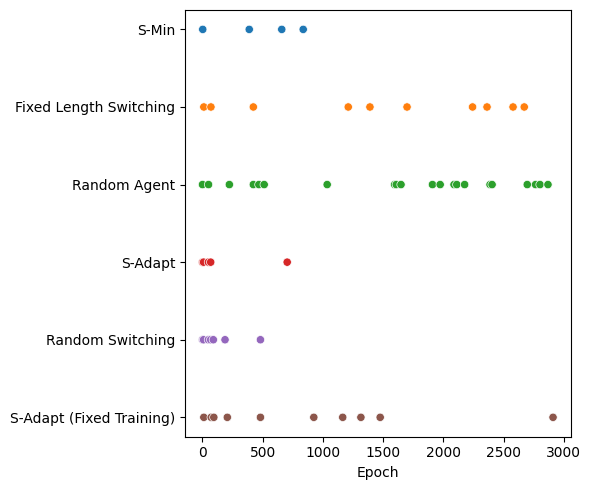

In [130]:
fig, ax = plt.subplots(1,1,figsize=(6,5))
ax = sns.scatterplot(df[(df.type=='death') & (df.alg.isin(include_list)) & (df.y==1.0)], 
                hue='alg', x='x', y='alg', ax=ax)
ax.set(xlabel='Epoch', ylabel='')
ax.legend(title="")
plt.legend([],[], frameon=False)
# ax.set_yticklabels([textwrap.fill(e, width) for e in data[y].head()])

plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/carnival_deaths.png")

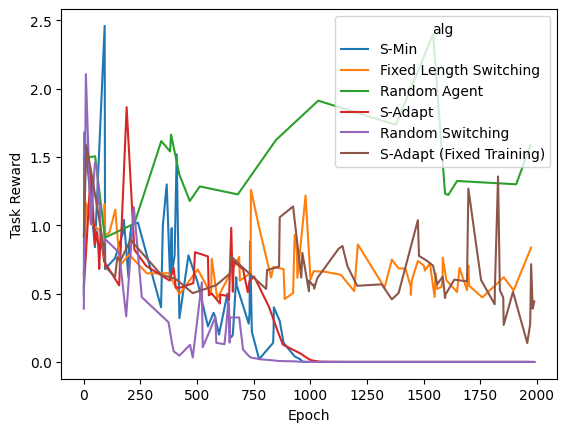

In [79]:
ax = sns.lineplot(df[(df.type=='task_reward') & df.alg.isin(include_list) & (df.x < 2000)], 
                  hue='alg', x='x', y='y', errorbar=None)
ax.set(xlabel='Epoch', ylabel='Task Reward')
plt.savefig(f"{SAVE_DIR}/carnival_reward.png")

### Tetris

In [80]:
with open(f'/home/ahugessen/Documents/Courses/IFT6163/Final Project/data/tetris_task_reward_chart_data.json') as f:
    data = json.load(f)

In [81]:
df = pd.DataFrame()
for d in data:
    min_len = min(len(d['x']), len(d['y']))
    temp_df = pd.DataFrame({'x':d['x'][:min_len],'y':d['y'][:min_len]})
    temp_df['type'] = "task_reward"
    temp_df['alg'] = d['name'].split('Tetris_')[-1]
    df = pd.concat([df, temp_df])

In [82]:
df.alg.unique()


array(['test', 'RandomAgent', 'SA_500len', 'SA_FixedLengthAlphas_500len',
       'SA_RandomAlphas_500len', 'SMiRL'], dtype=object)

In [83]:
df = df[df.x < 3000]

In [84]:
plot_names = {'SMiRL': 'S-Min',
             'SA_500len': 'S-Adapt',
             'test': 'S-Adapt (Fixed Training)',
             'SA_RandomAlphas_500len': 'Random Switching',
             'SA_FixedLengthAlphas_500len': 'Fixed Length Switching',
             'RandomAgent': 'Random Agent'}

In [85]:
df.alg = df.alg.replace(plot_names)

In [86]:
import seaborn as sns

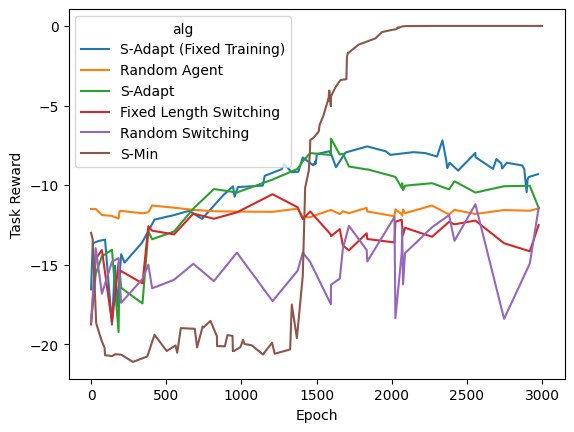

In [87]:
ax = sns.lineplot(df[(df.type=='task_reward')&df.alg.isin(include_list)], 
                  hue='alg', x='x', y='y', errorbar=None)
ax.set(xlabel='Epoch', ylabel='Task Reward')
plt.savefig(f"{SAVE_DIR}/tetris_reward.png")

#### Surprise

In [88]:
with open(f'/home/ahugessen/Documents/Courses/IFT6163/Final Project/data/tetris_eval_surprise_chart_data.json') as f:
    data = json.load(f)

In [89]:
df = pd.DataFrame()
for d in data:
    min_len = min(len(d['x']), len(d['y']))
    temp_df = pd.DataFrame({'x':d['x'][:min_len],'y':d['y'][:min_len]})
    temp_df['type'] = "task_reward"
    temp_df['alg'] = d['name'].split('Tetris_')[-1]
    df = pd.concat([df, temp_df])

In [90]:
df.alg.unique()


array(['test', 'RandomAgent', 'SA_500len', 'SA_FixedLengthAlphas_500len',
       'SA_RandomAlphas_500len', 'SMiRL'], dtype=object)

In [91]:
df = df[df.x < 3000]

In [92]:
plot_names = {'SMiRL': 'S-Min',
             'SA_500len': 'S-Adapt',
             'test': 'S-Adapt (Fixed Training)',
             'SA_RandomAlphas_500len': 'Random Switching',
             'SA_FixedLengthAlphas_500len': 'Fixed Length Switching',
             'RandomAgent': 'Random Agent'}

In [93]:
df.alg = df.alg.replace(plot_names)

In [94]:
import seaborn as sns

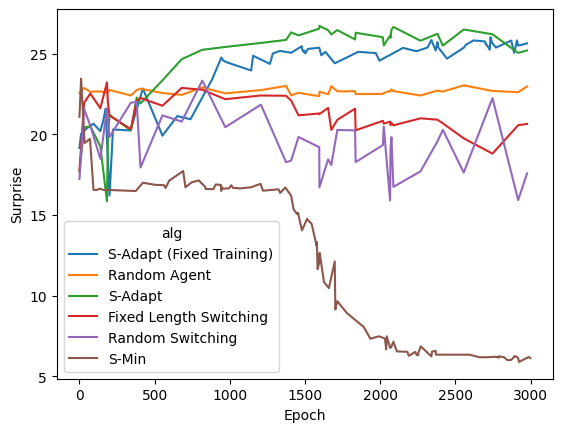

In [95]:
ax = sns.lineplot(df[(df.type=='task_reward') & df.alg.isin(include_list)], 
                  hue='alg', x='x', y='y', errorbar=None)
ax.set(xlabel='Epoch', ylabel='Surprise')
plt.savefig(f"{SAVE_DIR}/tetris_surprise.png")